# Spotify Reccomender System

# Businesss Understanding 

# Objectives

# Data Understanding 

# Data Exploraion

In [1]:
import pandas as pd                # For data manipulation and analysis
import numpy as np    
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder  # For scaling and encoding
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.feature_extraction.text import TfidfVectorizer  # For text feature extraction
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.tree import DecisionTreeClassifier  # For decision tree model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For ensemble models
from sklearn.svm import SVC  # For support vector classifier
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors
from keras.models import Sequential  # For building neural networks
from keras.layers import Dense, Embedding, Flatten, Input  # For neural network layers
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.tree import DecisionTreeClassifier  # For decision tree model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For ensemble models
from sklearn.svm import SVC  # For support vector classifier
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors
from keras.models import Sequential  # For building neural networks
from keras.layers import Dense, Embedding, Flatten, Input  # For neural network layers
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('./Data/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Data Preprocessing

In [5]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0']) 


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with any null values
df = df.dropna()


Missing values per column:
 track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [7]:
# Convert 'track_id' to a categorical type
df['track_id'] = df['track_id'].astype('category')


In [8]:
# Convert 'explicit' column to binary (0 for False, 1 for True)
df['explicit'] = df['explicit'].astype(int)


In [9]:
# Split artists by delimiter (assuming it’s a semicolon, adjust as needed)
df['artists'] = df['artists'].str.split(';')


In [10]:
# Create a 'mood' feature by averaging 'danceability', 'energy', and 'valence'
df['mood'] = df[['danceability', 'energy', 'valence']].mean(axis=1)


In [11]:
df.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0.617333
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0.284333
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0.305667
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0.156200
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0.409333
5,01MVOl9KtVTNfFiBU9I7dc,[Tyrone Wells],Days I Will Remember,Days I Will Remember,58,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,0.611667
6,6Vc5wAMmXdKIAM7WUoEb7N,"[A Great Big World, Christina Aguilera]",Is There Anybody Out There?,Say Something,74,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,0.210167
7,1EzrEOXmMH3G43AXT1y7pA,[Jason Mraz],We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,0.619667
8,0IktbUcnAGrvD03AWnz3Q8,"[Jason Mraz, Colbie Caillat]",We Sing. We Dance. We Steal Things.,Lucky,74,189613,0,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,0.569333
9,7k9GuJYLp2AzqokyEdwEw2,[Ross Copperman],Hunger,Hunger,56,205594,0,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,0.423333


# EDA

## Univariate 

### 1. Distribution of Song Popularity

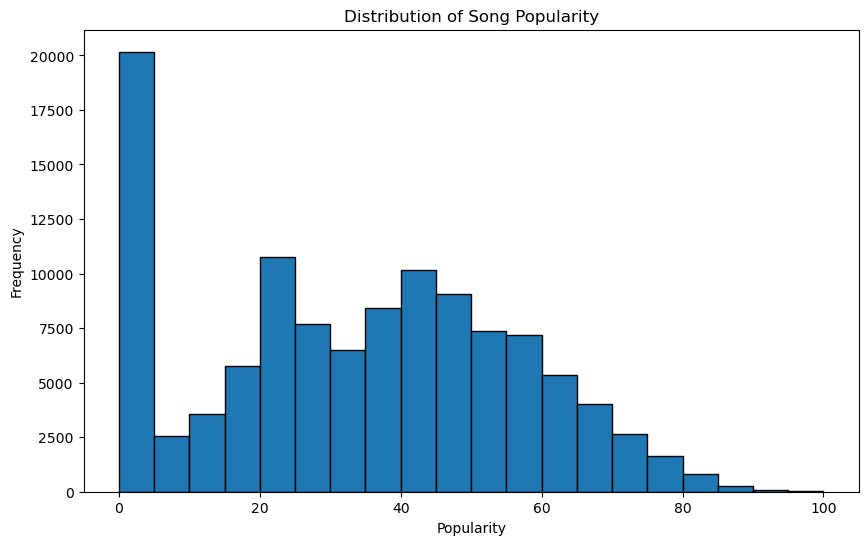

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20, edgecolor='black')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of song popularity scores across the dataset. The plot reveals a high frequency of songs with low popularity (near zero), suggesting that a large portion of the dataset consists of less popular tracks. As popularity increases, the frequency of songs decreases, indicating that only a small subset of songs achieves high popularity scores.


### 2. Count of Explicit vs. Non-Explicit Songs

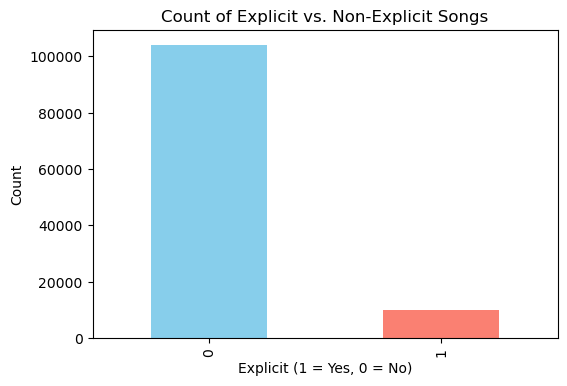

In [13]:
explicit_counts = df['explicit'].value_counts()
plt.figure(figsize=(6, 4))
explicit_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Explicit vs. Non-Explicit Songs')
plt.xlabel('Explicit (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


This bar chart compares the number of explicit versus non-explicit songs. The vast majority of songs are non-explicit, with only a small proportion marked as explicit. This distribution may reflect a preference for cleaner content or limited explicit content across most songs in the dataset.


### 3. Top 10 Most Frequent Genres

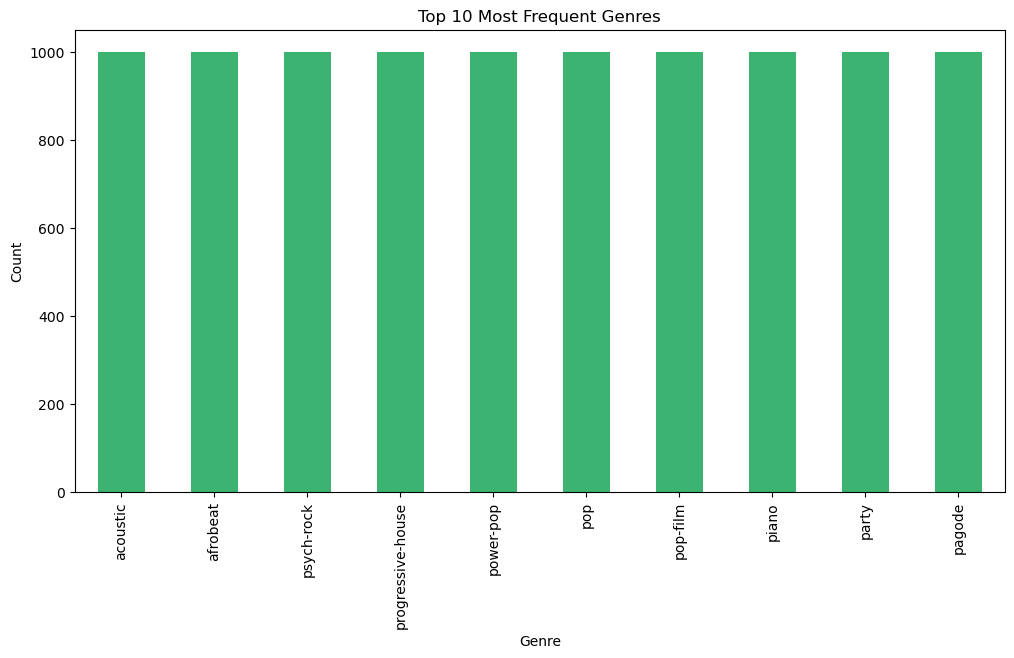

In [14]:
top_genres = df['track_genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


The bar chart displays the top 10 most frequent genres in the dataset. Each genre appears with nearly identical frequency, indicating a balanced representation across these popular genres. This balance allows for diverse recommendations across different music styles in the recommendation system.


### 4. Distribution of Loudness

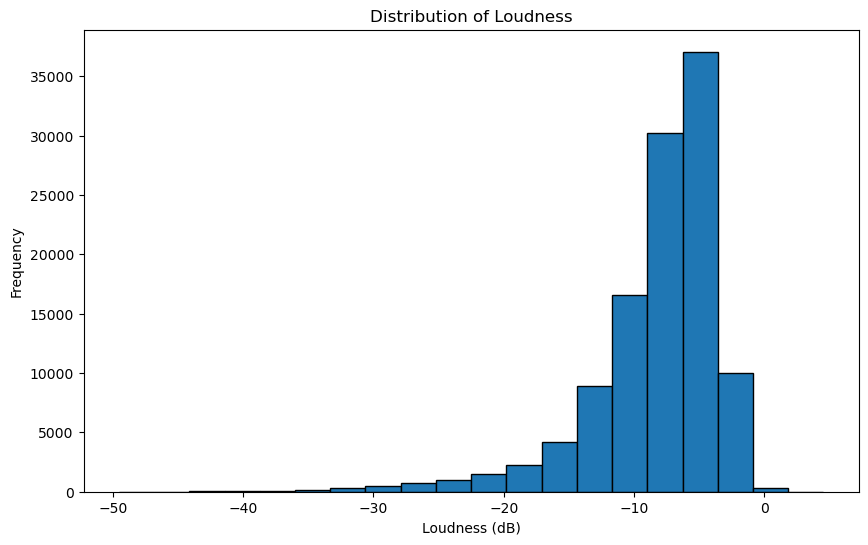

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['loudness'], bins=20, edgecolor='black')
plt.title('Distribution of Loudness')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frequency')
plt.show()


This histogram illustrates the distribution of song loudness in decibels (dB). The majority of songs have loudness values between -20 dB and -5 dB, with a skew towards quieter songs (lower loudness values). Very few songs have extreme loudness levels, either very soft (below -30 dB) or close to 0 dB.


### 5. Distribution of Mood

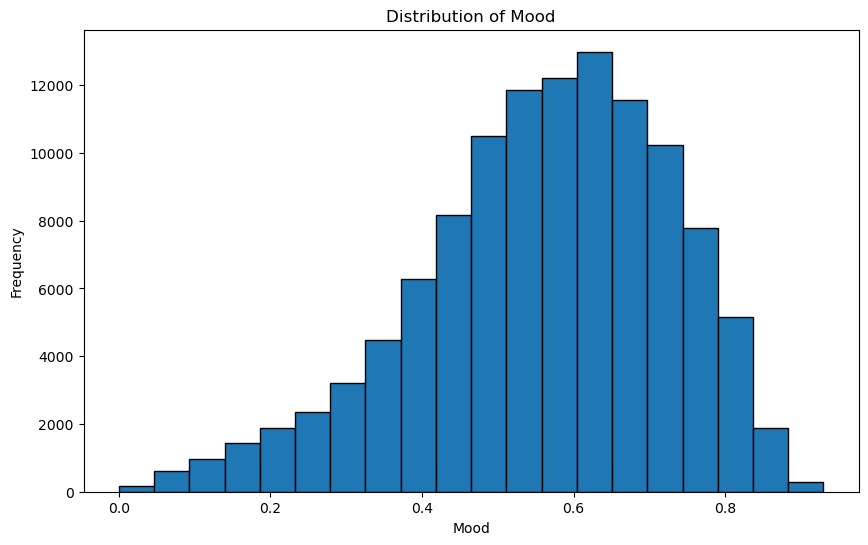

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['mood'], bins=20, edgecolor='black')
plt.title('Distribution of Mood')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of the derived "mood" score, calculated as an average of danceability, energy, and valence. The distribution is roughly normal, peaking around a mood score of 0.6, indicating that most songs fall within a moderate-to-positive mood range. There are fewer songs at the extremes (very low or very high mood scores), suggesting that most songs maintain a balanced mood.


## Bivariate 

### 1. Danceability by Mode

<Figure size 800x600 with 0 Axes>

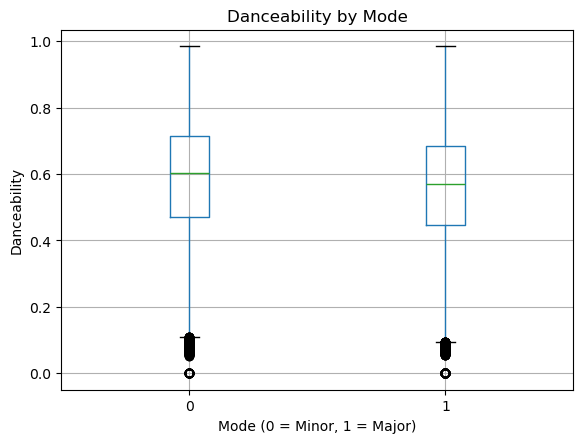

In [17]:
plt.figure(figsize=(8, 6))
df.boxplot(column='danceability', by='mode')
plt.title('Danceability by Mode')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Danceability')
plt.suptitle('')
plt.show()


This box plot shows the distribution of danceability scores for songs in different modes, where 0 represents a minor key, and 1 represents a major key. The median danceability is similar across both modes, with no significant difference between minor and major modes. The spread and range of danceability scores are also comparable, indicating that a song's mode (major or minor) does not have a strong influence on its danceability.

### 2. Popularity by Explicit Content

<Figure size 800x600 with 0 Axes>

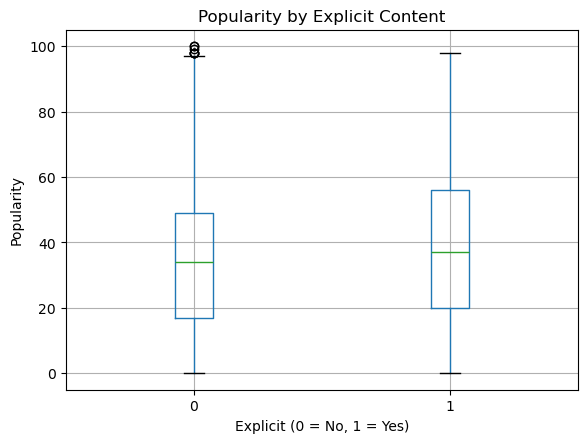

In [18]:
plt.figure(figsize=(8, 6))
df.boxplot(column='popularity', by='explicit')
plt.title('Popularity by Explicit Content')
plt.xlabel('Explicit (0 = No, 1 = Yes)')
plt.ylabel('Popularity')
plt.suptitle('')
plt.show();


This box plot illustrates the distribution of popularity scores based on whether a song is explicit or non-explicit. The median popularity appears to be slightly higher for explicit songs compared to non-explicit ones, though both categories share a similar overall range. This suggests that while explicit content might have a minor association with popularity, it’s not a strong determining factor.

### 4. Correlation Heatmap of Numerical Features

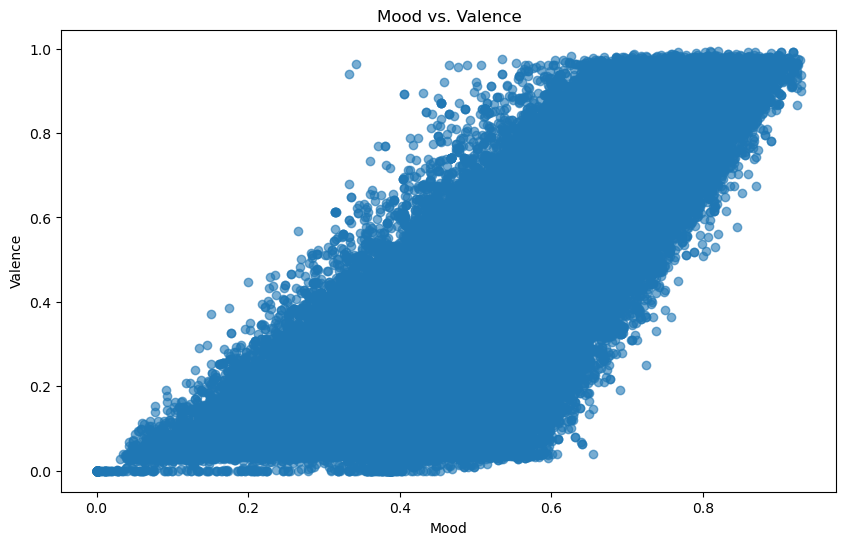

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mood'], df['valence'], alpha=0.6)
plt.title('Mood vs. Valence')
plt.xlabel('Mood')
plt.ylabel('Valence')
plt.show()


This scatter plot visualizes the relationship between mood and valence. Valence, representing the positivity of a song, shows a generally positive correlation with the mood score, as expected since mood is derived partly from valence. Songs with higher mood scores tend to have higher valence, indicating they are perceived as more positive or uplifting.

## Multivariate

###  Correlation Heatmap of Numerical Features


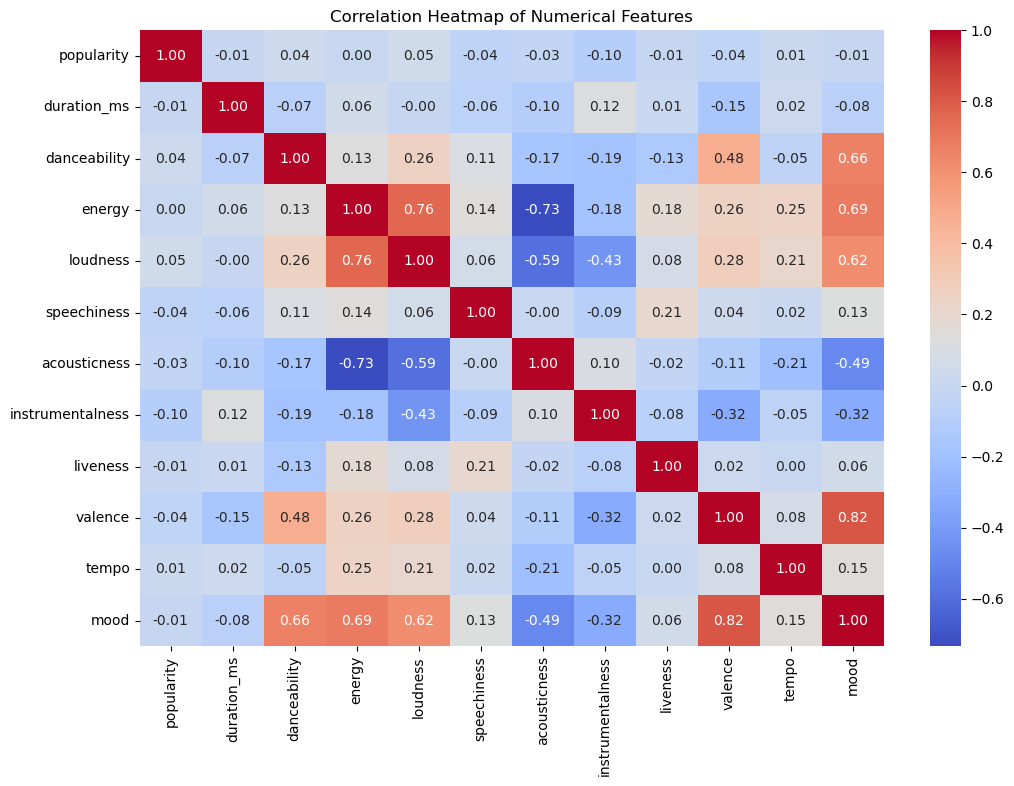

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
                         'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'mood']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()




The heatmap presents the correlations between various numerical features in the dataset. Notable relationships include:

- **Energy and Loudness**: There is a strong positive correlation (0.76) between `energy` and `loudness`, suggesting that louder songs tend to be more energetic.
- **Valence and Mood**: A high correlation (0.82) exists between `valence` and `mood`, which makes sense as `mood` is derived in part from valence. This indicates that songs with a higher mood score generally have higher positivity.
- **Acousticness with Energy and Loudness**: `Acousticness` has negative correlations with both `energy` (-0.73) and `loudness` (-0.59), implying that more acoustic songs are typically quieter and less energetic.

These insights from the heatmap can guide feature selection and interpretation in modeling, as they reveal relationships and potential multicollinearity between features.


# Modeling

## Preprocessing For Modelling

Since we do not have user-interaction data such as ratings , we are going to use popularity to simulate user interaction items. We will therefore use a MinMaxScaler to normalize our `popularity` column to a scale of 1 to 5. 

Moreover, we do not have `user_id` or identifier information, therefore we need to decide how we want to model user behaviour. 
1. simulate user_id using `track_genre` information - this approach works if we want to simulate users who prefer specific genres. Each genre can represent a "user," and you can assume that users (genres) would interact with multiple tracks within that genre. This simulates varying preferences based on genre popularity.
2. using `track_name` -
3. `artists` - aims to recommend music based on specific artists. Many users have preferences for certain artists. Users might listen to multiple tracks by the same artist, leading to more interactions and data points associated with those synthetic user IDs. This also provides a more granularized approach as it may lead to more personalized recommendations.
   >> this however, loses the genre preference information as users might prefer a mix of styles from an artist. Also, users might like various artists in the same genre and using this will  not reflect that.
4. Combination of `artists` and `track_genre` - allows capturing a widerrange of user preferences as a user may enjoy multiple tracks from various artists across different genres.

In [21]:
df.shape

(113999, 21)

In [23]:
from surprise import Dataset, Reader, SVD, KNNBaseline
from sklearn.preprocessing import MinMaxScaler
from surprise import accuracy
from scipy.sparse import csr_matrix
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample the data if needed
df = df.sample(n=20000, random_state=42)

# Step 1: Convert both 'artists' and 'track_genre' to strings to handle concatenation
df['user_id'] = df['artists'].astype(str) + '_' + df['track_genre'].astype(str)

# Step 2: Normalize popularity scores to fit a rating scale of 1 to 5
scaler = MinMaxScaler(feature_range=(1, 5))
df['rating'] = scaler.fit_transform(df[['popularity']])

# Step 3: Check for NaN values and drop them if necessary
df.dropna(subset=['user_id', 'track_id', 'rating'], inplace=True)

# Step 4: Define the Reader and load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'track_id', 'rating']], reader)

# Step 5: Split the dataset into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Display the first few rows of the filtered DataFrame for verification
df.head()



,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood,user_id,rating
81240,0kSXvy1MXTv5A7rbqF3qlF,"[Ed Sheeran, Elton John]",Holly Jolly Christmas,Merry Christmas,3,208546,0,0.594,0.935,0,-2.018,1,0.0357,0.2430,0.000002,0.102,0.602,113.990,4,pop,0.710333,"['Ed Sheeran', 'Elton John']_pop",1.122449
53286,0JwtmsNI76noYakct1EhhN,[Galantis],From The Ashes - New Beats,1x1,0,139435,0,0.887,0.863,2,-4.200,1,0.0697,0.0176,0.059400,0.288,0.517,120.028,4,house,0.755667,['Galantis']_house,1.000000
104787,1wqg3MCpuvA1ZlUlGim7Ah,[Soleá Morente],El Que Sabem (Original Motion Picture Soundtrack),Viniste A Por Mí,2,198733,0,0.726,0.871,9,-5.323,1,0.0617,0.3360,0.000362,0.123,0.831,119.974,4,spanish,0.809333,['Soleá Morente']_spanish,1.081633
107665,2HFHMKuExajvpnKMERs3Wo,[Modern Talking],Back For Good,Brother Louie '98 - New Version,41,216093,0,0.762,0.956,2,-3.398,0,0.0421,0.1890,0.074700,0.318,0.961,118.311,4,synth-pop,0.893000,['Modern Talking']_synth-pop,2.673469
74807,3mkR76gP08Yd9hW8yfqv4T,[Big Up],AZÙ,Luz Do Bem,40,170068,0,0.727,0.583,9,-8.111,1,0.0499,0.0805,0.000000,0.210,0.728,92.004,4,mpb,0.679333,['Big Up']_mpb,2.632653


### Model 1 - KNNBaseline 


In [25]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.similarities import cosine, msd, pearson


# Step 1: Prepare your DataFrame (Assuming 'filtered_spotify_df' is your DataFrame)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'track_id', 'rating']], reader)

# Step 2: Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Step 3: Define your model and parameter grid
param_grid = {
    'k': [5, 10, 15, 20],
    'min_k': [1, 5],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [True, False]
    }
}

# Step 4: Perform grid search for KNNBaseline
grid_search_knn = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3)
grid_search_knn.fit(data)



Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Com

In [26]:
# Step 5: Get the best KNN model
best_knn_model = grid_search_knn.best_estimator['rmse']

# Step 6: Fit the best model to the training set
best_knn_model.fit(trainset)

# Step 7: Predict ratings for the training set
# You can use the test method on the trainset
train_predictions = best_knn_model.test(trainset.build_testset())

# Step 8: Calculate RMSE for the training set predictions
train_rmse = accuracy.rmse(train_predictions)

# # Step 9: Predict ratings for the test set
# test_predictions = best_knn_model.test(testset)

# Step 10: Calculate RMSE for the test set predictions
# test_rmse = accuracy.rmse(test_predictions)

# Print the results
print(f"Best KNN Model Parameters: {grid_search_knn.best_params['rmse']}")
print(f"Training RMSE: {train_rmse:.4f}")
# print(f"Test RMSE: {test_rmse:.4f}")


Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.0104
Best KNN Model Parameters: {'k': 5, 'min_k': 1, 'sim_options': {'name': 'cosine', 'user_based': True}}
Training RMSE: 0.0104


In [27]:
# Step 3: Define parameter grid for SVD
param_grid = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'n_epochs': [20, 30, 40],     # Number of epochs
    'lr_all': [0.005, 0.01],      # Learning rate for all parameters
    'reg_all': [0.02, 0.1],       # Regularization term
}

# Step 4: Perform grid search for SVD
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
grid_search_svd.fit(data)




In [28]:
# Step 5: Get the best SVD model
best_svd_model = grid_search_svd.best_estimator['rmse']

# Step 6: Fit the best model to the training set
best_svd_model.fit(trainset)

# Step 7: Predict ratings for the training set
train_predictions = best_svd_model.test(trainset.build_testset())

In [29]:

# Step 8: Calculate RMSE for the training set predictions
train_rmse = accuracy.rmse(train_predictions)

# Step 9: Predict ratings for the test set
# test_predictions = best_svd_model.test(testset)

# Step 10: Calculate RMSE for the test set predictions
# test_rmse = accuracy.rmse(test_predictions)

# Print the results
print(f"Best SVD Model Parameters: {grid_search_svd.best_params['rmse']}")
print(f"Training RMSE: {train_rmse:.4f}")
# print(f"Test RMSE: {test_rmse:.4f}")

RMSE: 0.2308
Best SVD Model Parameters: {'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.02}
Training RMSE: 0.2308


# Evaluation

# Limitations

# Conclusion

# Reccomendations